In [58]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [59]:
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5) ##should not be less than 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [60]:
#faceapp.get()

In [61]:
### Extracting Facial Features

In [62]:
import re #regular expression

In [63]:
def clean_name(string):
    sample_str = 'Chris_Evans'
    ### removes all special characters
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [64]:
person_info = []
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name=folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =', role, end='\t')
    #print('Name =', name)
    
    ###path of each image in respective folder
    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        ### Step 1: read the image:
        img_arr = cv2.imread(path)
        
        ### Step 2: Get the facial analysis info:
        result = faceapp.get(img_arr,max_num=1)  ### returns list
        
        if len(result)>0:
             ### Step 3: Extract the facial embeddings
            res = result[0]
            embedding = res['embedding']
            
            ###Step 4: Save all info [name,role, embedding in a list]
            person_info.append([name, role, embedding])

In [65]:
dataframe = pd.DataFrame(person_info,columns=['name','role','facial_features'])
dataframe ### store in redis database

,name,role,facial_features
0,Angelina Jolie,Student,"[-0.8410335, 1.6623635, -0.745449, -2.138221, ..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6630238, 1.161926, -0.4108489, -2.6416948, ..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,Student,"[0.40983105, 1.1813736, -0.9961994, -1.4018284..."
6,Angelina Jolie,Student,"[0.42182076, 2.0830736, 1.0647428, -2.273447, ..."
7,Angelina Jolie,Student,"[0.3949412, 0.84420955, -0.615458, -2.105093, ..."
8,Angelina Jolie,Student,"[1.0928565, 1.1707087, -0.2880756, -2.0103226,..."
9,Angelina Jolie,Student,"[-0.63545597, 1.7897248, 0.5982856, -3.550097,..."


In [66]:
### Step 1: read test image
img_test = cv2.imread('test_photo.jpeg')
if img_test is None:
    print("Error: Failed to load the image.")
else:
    cv2.imshow('image', img_test)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [67]:
res_test = faceapp.get(img_test, max_num=0)
res_test
for i, rt in enumerate(res_test):
    bbox = rt['bbox'].astype(int)
    print('current loop=', i)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']

current loop= 0


In [68]:
### consider only one sample
len(embed_test)

512

In [69]:
embed_test

array([ 0.8752145 , -1.7068805 ,  0.09662658, -2.0210395 ,  1.4499011 ,
        2.0583122 , -0.57168186, -0.3184289 ,  2.7088766 ,  1.2400599 ,
        0.87804365,  2.185574  , -1.1649812 , -0.85922796, -1.330439  ,
        0.40435642,  0.5620316 , -0.30332434, -0.00486884, -1.2237226 ,
        0.3246835 , -0.6810001 ,  2.1883683 , -0.29930305,  1.4842473 ,
       -2.384647  , -0.04531109, -1.6936936 , -0.7221503 ,  0.33150506,
        1.4706103 , -0.36097524,  0.22039801,  0.7501424 ,  0.64982414,
        0.8644137 ,  0.5700162 ,  0.13365877,  1.7979565 , -0.9708073 ,
       -1.267959  ,  1.4738601 ,  0.35058534,  0.76432264,  0.16930139,
        0.71061355,  1.0472986 , -0.71568334, -0.92384946, -0.5684562 ,
       -0.7805015 ,  0.45599532,  0.9126754 , -0.41959798,  0.02085271,
       -1.3140267 ,  0.6815956 ,  0.9069934 ,  0.6998207 , -0.9889722 ,
       -0.8677323 , -0.7481117 , -0.34910136,  0.29505473, -1.3519261 ,
       -0.90919316,  0.8374458 ,  0.3578686 ,  0.20792055,  1.39

In [70]:
X_list = dataframe['facial_features'].tolist()
X = np.asarray(X_list)

In [71]:
X.shape ### shows 50 samples and each sample is 512 dimensions

(50, 512)

In [72]:
from sklearn.metrics import pairwise

In [73]:
y= embed_test.reshape(1,512) ### reshapes array into 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [74]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [75]:
data_search

,name,role,facial_features,equlidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.8410335, 1.6623635, -0.745449, -2.138221, ...",32.994366,598.013110,-0.094236
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",31.698061,578.169372,0.008909
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824...",33.586193,600.370294,-0.077927
3,Angelina Jolie,Student,"[1.6630238, 1.161926, -0.4108489, -2.6416948, ...",33.032200,592.398461,0.009472
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -...",33.243988,604.189513,-0.045112
5,Angelina Jolie,Student,"[0.40983105, 1.1813736, -0.9961994, -1.4018284...",32.986595,607.305353,-0.061645
6,Angelina Jolie,Student,"[0.42182076, 2.0830736, 1.0647428, -2.273447, ...",31.383904,572.555309,0.012757
7,Angelina Jolie,Student,"[0.3949412, 0.84420955, -0.615458, -2.105093, ...",32.323818,587.386396,-0.035540
8,Angelina Jolie,Student,"[1.0928565, 1.1707087, -0.2880756, -2.0103226,...",32.766453,593.112626,-0.018859
9,Angelina Jolie,Student,"[-0.63545597, 1.7897248, 0.5982856, -3.550097,...",34.670063,637.267135,-0.055152


In [76]:
import matplotlib.pyplot as plt

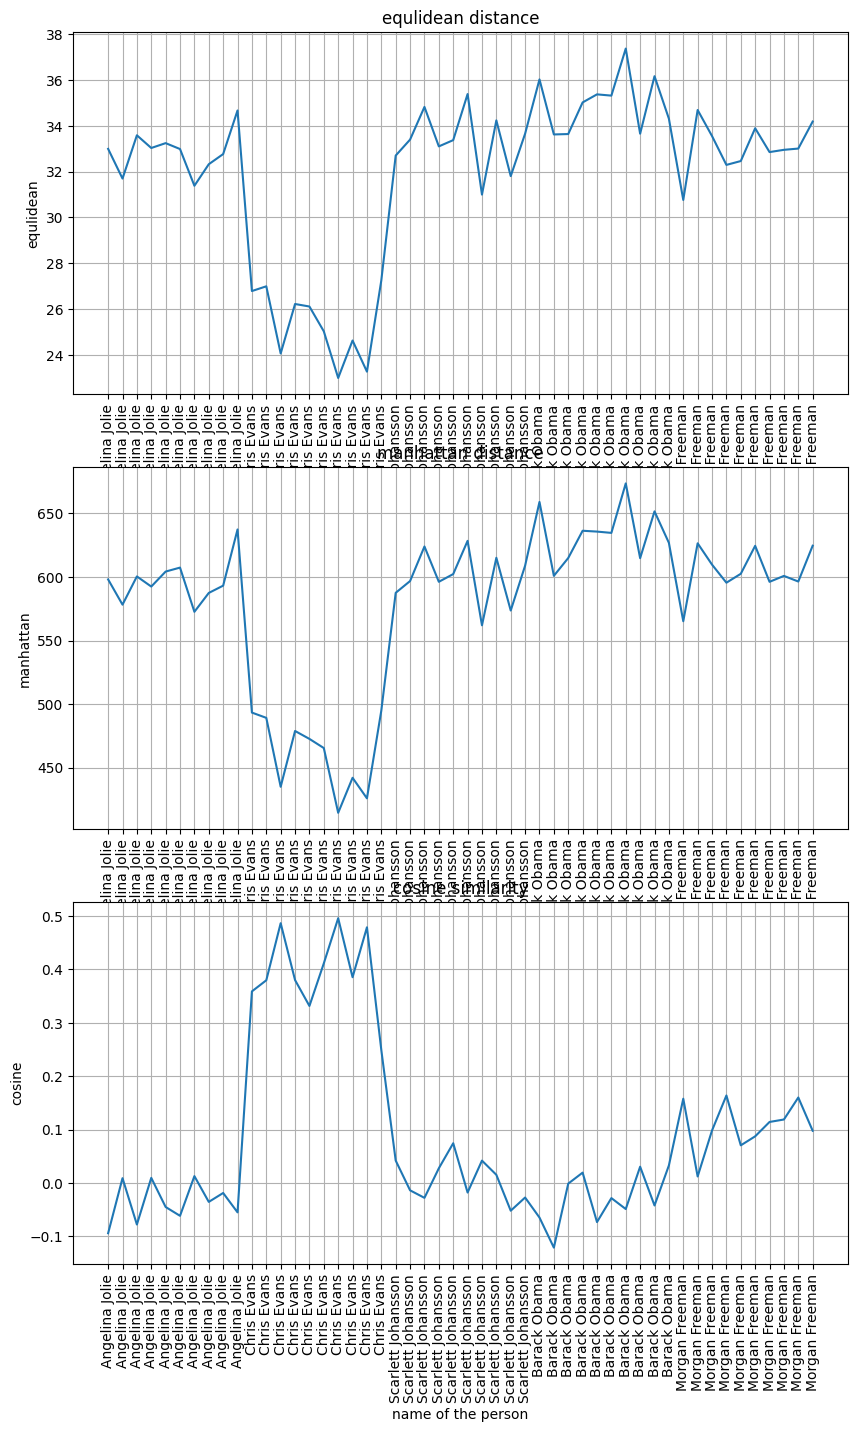

In [77]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))), labels=data_search['name'],rotation=90)
plt.xlabel('name of the person')
plt.ylabel('equlidean')
plt.title('equlidean distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))), labels=data_search['name'],rotation=90)
plt.xlabel('name of the person')
plt.ylabel('manhattan')
plt.title('manhattan distance')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['cosine']))), labels=data_search['name'],rotation=90)
plt.xlabel('name of the person')
plt.ylabel('cosine')
plt.title('cosine similarity')
plt.grid()

plt.show()

In [78]:
### Identifying person's name using Euclidean distance

In [79]:
d_eq_optimal = 26.5 ### 25 in tutorial

In [80]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)
datafilter

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name_equ, role_equ = datafilter.loc[argmin][['name','role']]
else:
    name_equ = 'Unknown'
    role_equ = 'Unknown'

In [81]:
print(name_equ, role_equ)    

Chris Evans Student


In [82]:
### Identifying person's name using Manhattan distance

In [83]:
d_man_optimal = 450

In [84]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)
datafilter

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man, role_man = datafilter.loc[argmin][['name','role']]
else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [85]:
print(name_man, role_man) 

Chris Evans Student


In [86]:
### Identifying person's name using cosine similarity

In [87]:
s_optimal = 0.2 ### 0.5 in tutorial

In [88]:
datafilter = data_search.query(f'cosine > {s_optimal}')
datafilter.reset_index(drop=True,inplace=True)
datafilter

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cosine, role_cosine = datafilter.loc[argmin][['name','role']]
else:
    name_cosine = 'Unknown'
    role_cosine = 'Unknown'

In [89]:
print(name_cosine, role_cosine) 

Chris Evans Student


In [97]:
### Identify multiple people in one image

In [98]:
def ml_search_algorithm(dataframe, feature_column, test_vector,name_role=['name','role'], thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    ### Step 1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    
     ### Step 2: Index face embeding from the dataframe and convert into an array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)
        
    ### Step 3: Calculating Cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr
        
    ### Step 4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        ### Step 5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role] 
    
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
        
    return person_name, person_role
        

In [116]:
test_image = cv2.imread('test_pict.jpg')
if test_image is None:
    print("Error: Failed to load the image.")
else:
    cv2.imshow('image', test_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [120]:
#step 1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

#step 2: use for loop and extract each embedding and pass it through ml_search_algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress, 
                                                   'facial_features',
                                                    test_vector=embeddings, 
                                                    name_role=['name','role'],
                                                    thresh=0.5)
    
    if person_name == 'Unknown':
        color = (0,0,255) #bgr
    else:
       color = (0,255,0)
    
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)

cv2.imshow('test image',test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [119]:
###Compressing the dataset

dataframe_compress = dataframe.groupby(by=['name','role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,name,role,facial_features
0,Angelina Jolie,Student,"[0.4324317, 1.074975, -0.12851736, -1.833421, ..."
1,Barack Obama,Teacher,"[0.94846946, -0.5583677, 0.09491567, -1.279613..."
2,Chris Evans,Student,"[0.72002447, -1.4682528, -0.77743137, -1.45999..."
3,Morgan Freeman,Teacher,"[0.48562637, -0.61965686, -0.4072629, 1.068597..."
4,Scarlett Johansson,Student,"[0.1912692, -0.48850536, -1.6902622, 0.4422732..."


In [121]:
### convert the dataframe into array and save in numpy zip format

In [123]:
xvalues = dataframe_compress.values
xvalues

array([['Angelina Jolie', 'Student',
        array([ 4.32431698e-01,  1.07497501e+00, -1.28517359e-01, -1.83342099e+00,
               -7.27894962e-01, -1.23478580e+00, -2.34371498e-01, -3.73195887e-01,
               -6.96727574e-01, -3.52599770e-01, -1.86734408e-01, -8.56367767e-01,
               -7.25917757e-01,  1.59811819e+00,  1.89431876e-01, -8.71563181e-02,
               -8.61443207e-02,  9.60008949e-02, -4.31728780e-01,  5.76174371e-02,
                1.06118068e-01, -1.08412838e+00, -3.68282855e-01, -3.46593767e-01,
                5.47743857e-01, -3.21061790e-01,  1.65757394e+00,  3.66954863e-01,
                9.40257430e-01,  1.18212664e+00,  4.02751446e-01,  5.15111387e-01,
                2.07609081e+00, -1.63683343e+00, -1.61303684e-01, -9.74441692e-02,
               -7.65372336e-01,  7.55956531e-01, -1.70625043e+00,  2.01861054e-01,
               -1.64390409e+00,  5.47618628e-01,  2.28820726e-01, -3.25713366e-01,
                1.90994948e-01,  3.10903162e-01, -

In [125]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['name', 'role', 'facial_features'], dtype=object)

In [126]:
np.savez('dataframe_students_teachers.npz',xvalues,col_name)

In [127]:
# load numpy zip 
file_np = np.load('dataframe_students_teachers.npz', allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [128]:
pd.DataFrame(file_np['arr_0'],columns = file_np['arr_1'])

,name,role,facial_features
0,Angelina Jolie,Student,"[0.4324317, 1.074975, -0.12851736, -1.833421, ..."
1,Barack Obama,Teacher,"[0.94846946, -0.5583677, 0.09491567, -1.279613..."
2,Chris Evans,Student,"[0.72002447, -1.4682528, -0.77743137, -1.45999..."
3,Morgan Freeman,Teacher,"[0.48562637, -0.61965686, -0.4072629, 1.068597..."
4,Scarlett Johansson,Student,"[0.1912692, -0.48850536, -1.6902622, 0.4422732..."
